# Weather dataset

### This weather dataset is a time-series dataset with per-hour information about the weather conditions at a particular location. It records temperature, humidity, wind speed, visibility, pressure, and other conditions...This dataset is in csv form and we are going to answer some questions on this data.

### Import necessary libraries

In [35]:
import pandas as pd

### Read csv file into a DataFrame

In [54]:
data = pd.read_csv('Weather_data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Identify number of rows and columns

In [38]:
rows = data.shape[0]
columns = data.shape[1]
print('Number of rows:', rows)
print('Number of columns:', columns)

('Number of rows:', 8784)
('Number of columns:', 8)


### Inedtify the columns

In [39]:
list(data.columns)

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

### Inedtify the type of each column

In [40]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

### Print unique elements in a column

In [41]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

### Number of unique elements in each column

In [42]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

### Number of null elements in each column

In [92]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
Hour                0
dtype: int64

### Number of non_null elements in each column again

In [95]:
data.notnull().sum()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
Hour                8784
dtype: int64

### Number of non-null elements in each column

In [43]:
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

### Unique values in each column and their count

In [44]:
data['Weather'].value_counts().head(10)

Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: Weather, dtype: int64

### Another way is to use groupby in python

In [45]:
data['Count'] = 1
data1 = data.groupby('Weather')['Count'].sum().reset_index()
data1 = data1.sort_values(by=['Count'], ascending=False)
data1.head(10)

,Weather,Count
19,Mainly Clear,2106
23,Mostly Cloudy,2069
1,Cloudy,1728
0,Clear,1326
35,Snow,390
24,Rain,306
25,Rain Showers,188
7,Fog,150
28,"Rain,Fog",116
3,"Drizzle,Fog",80


### Question 1: Find all the unique 'Wind Speed' values in the data.

In [46]:
data1 = data['Wind Speed_km/h'].unique()
data1

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

### Find average wind speed during the day

First we convert data and time and datetime format that is understandable by python, 
then we add a column for hour and group by hour. Then, we find average speed in each hour of the day. Then, we plot it. 

In [57]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [58]:
data['Hour'] = data['Date/Time'].dt.hour
data1 = data.groupby('Hour')['Wind Speed_km/h'].mean().reset_index()
data1.head()

,Hour,Wind Speed_km/h
0,0,13.002732
1,1,12.775956
2,2,12.642077
3,3,12.885246
4,4,12.754098


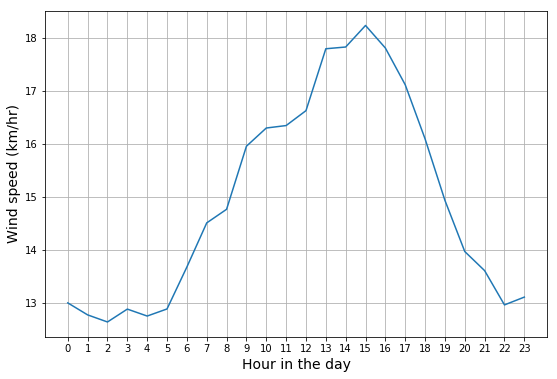

In [59]:
import matplotlib.pyplot as plt
x = data1['Hour']
y = data1['Wind Speed_km/h']
plt.plot(x, y)
plt.grid()
plt.xlabel('Hour in the day', size=14)
plt.ylabel('Wind speed (km/hr)', size=14)
plt.xticks(x)

plt.rcParams['figure.figsize'] = (9,6)
plt.show()

### Question 2: Find the number of times when the 'Weather is exactly Clear'.
#### Then, we can work out the probability of having clear sky

In [85]:
data2 = data.loc[data['Weather'] == 'Clear']
m = data2.shape[0]
mm = data.shape[0]
pr = float(m) / float(mm)

print('Number of times it is clear is {}'.format(m))
print('The probability of having a clear sky is {:.4f}'.format(pr))

Number of times it is clear is 1326
The probability of having a clear sky is 0.1510


### Question 3: Find the number of times when the 'Wind Speed was exactly 4 km/h'.

In [86]:
data3 = data.loc[data['Wind Speed_km/h'] == 4]
m = data3.shape[0]

print('Number of times wind speed is exactly 4 km/hr is {}'.format(data3.shape[0]))
print('The probability of having wind with this speed is {:.4f}'.format(float(m) / mm))

Number of times wind speed is exactly 4 km/hr is 474
The probability of having wind with this speed is 0.0540


### Question 4: Find out all the Null Values in the data.

In [96]:
data4 = data.loc[data.isna().any(axis=1)]
data4

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Hour


There is no row with a null value in any column

### Question 5: Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

In [103]:
data.rename(columns={'Weather': 'Weather conditions'}, inplace=True)
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4


### Question 6: What is the mean visibility? 

In [106]:
mean_vis = data['Visibility_km'].mean()

print('Mean visibility is {:.2f} km'.format(mean_vis))

Mean visibility is 27.66 km


### Question 7: What is the Standard Deviation of 'Pressure'  in this data?

In [107]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,11.500000
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,6.922581
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,0.000000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,5.750000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,11.500000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,17.250000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,23.000000


In [108]:
data['Press_kPa'].std()

0.8440047459486474

### Question 8: What is the Variance of 'Relative Humidity' in this data ?

In [110]:
var = data['Rel Hum_%'].std()/100
var*var

0.02862485501984998

The value in the video is not correct because humidity is a value from 0 to 1. Therefore standard deviation and variance must be reported in a way that is statistically meaningful

### Question 9: Find all instances when 'Snow' was recorded.

In [114]:
data9 = data.loc[data['Weather conditions'] == 'Snow']
data9.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow,7
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow,12
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow,14
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow,15
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow,16


In [116]:
print('We have {} rows with snow'.format(data9.shape[0]))

We have 390 rows with snow


We must be careful here. We have other instances of snow in different forms

In [127]:
data9 = data.loc[data['Weather conditions'].str.contains('Snow')]
print('We have {} rows with snow in different forms'.format(data9.shape[0]))

We have 583 rows with snow in different forms


In [128]:
data9.tail(20)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
8740,2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog",4
8741,2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog",5
8742,2012-12-30 06:00:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog",6
8767,2012-12-31 07:00:00,-9.3,-11.3,85,0,19.3,101.19,Snow Showers,7
8768,2012-12-31 08:00:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers,8
8769,2012-12-31 09:00:00,-8.1,-9.6,89,4,2.4,101.09,Snow,9
8770,2012-12-31 10:00:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog",10
8771,2012-12-31 11:00:00,-6.7,-7.9,91,9,9.7,100.93,Snow,11
8772,2012-12-31 12:00:00,-5.8,-7.5,88,4,12.9,100.78,Snow,12
8773,2012-12-31 13:00:00,-4.6,-6.6,86,4,12.9,100.63,Snow,13


### Question 10: Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

In [129]:
data10 = data.loc[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km'] == 25)]
data10.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy,23
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,0
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy,1
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy,2
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy,3


In [131]:
print('We have {} rows with these conditions'.format(data10.shape[0]))
print('Also please remember, sometimes we need to use pd.to_numeric when values are not numbers')

We have 308 rows with these conditions
Also please remember, sometimes we need to use pd.to_numeric when values are not numbers


### Question 11: What is the mean value of each column against each weather condition ?

In [135]:
data11 = data.groupby('Weather conditions').mean().reset_index()
data11.head()

,Weather conditions,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour
0,Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443,10.071644
1,Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441,11.566551
2,Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366,13.829268
3,"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625,12.737500
4,"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000,9.000000


### Question 12: What is the minimum value of each column against each weather condition ?

In [136]:
data12 = data.groupby('Weather conditions').min().reset_index()
data12.head()

,Weather conditions,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour
0,Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52,0
1,Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39,0
2,Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84,1
3,"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65,0
4,"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79,9


### Question 13: Show all the records where weather condition is Fog.

In [139]:
data13 = data.loc[data['Weather conditions'] == 'Fog']
data13.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,5
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,6


In [140]:
print('We have {} rows with these conditions'.format(data13.shape[0]))

We have 150 rows with these conditions


In [141]:
data13 = data.loc[data['Weather conditions'].str.contains('Fog')]
data13.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4


In [142]:
print('We have {} rows with these conditions'.format(data13.shape[0]))

We have 426 rows with these conditions


### Question 14: Find all instances when 'Weather is Clear' or 'Visibility is above 40'.

In [148]:
data14 = data.loc[(data['Weather conditions'] == 'Clear') | (data['Visibility_km'] > 40)]
data14.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,19
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,10
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,11
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,12
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,13


In [149]:
print('We have {} rows with these conditions'.format(data14.shape[0]))

We have 3027 rows with these conditions


### Question 15: Find all instances when 'Weather is Clear' and 'Relative Humidity is greater than 50

In [150]:
data15 = data.loc[(data['Weather conditions'] == 'Clear') | (data['Rel Hum_%'] > 50)]
data15.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4


In [151]:
print('We have {} rows with these conditions'.format(data15.shape[0]))

We have 7553 rows with these conditions
